<a href="https://colab.research.google.com/github/Philocreation/My_Machine_Learning/blob/main/Template/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference from : https://www.youtube.com/watch?v=5HdxWe8T4sQ&list=PL7ZVZgsnLwEEd3-h-jySLz4wT154r7VVr&index=4

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
samples = 1000
X, y = make_classification(n_samples=samples,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1)

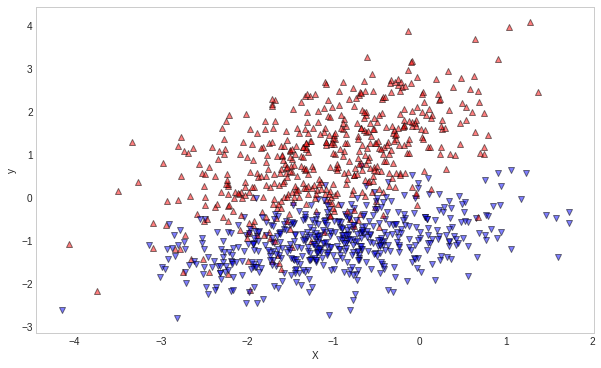

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] ==0:
    ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='^',color='r')
  else:
    ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='v',color='b')
  
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("학습 데이터 점수 = {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 = {}".format(model.score(X_test,y_test)))

학습 데이터 점수 = 0.9225
평가 데이터 점수 = 0.915


In [ ]:
scores = cross_val_score(model, X,y, scoring='accuracy', cv=10)
print("CV 평균 점수 = {}".format(scores.mean()))

CV 평균 점수 = 0.9209999999999999


In [ ]:
model.intercept_, model.coef_

(array([0.96187275]), array([[ 1.66040991, -3.63926889]]))

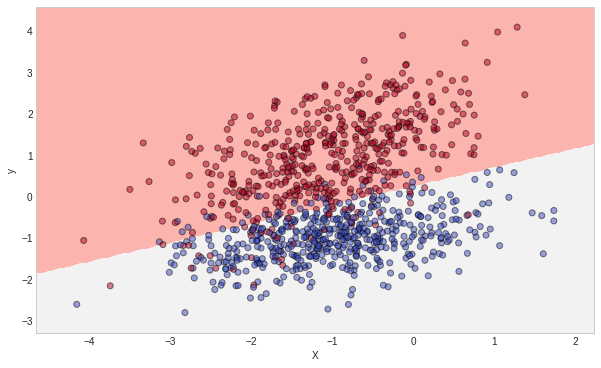

In [ ]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5,  X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:,0],X[:,1], c=np.abs(y -1), edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

## 붓꽃 데이터 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [3]:
import pandas as pd 

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


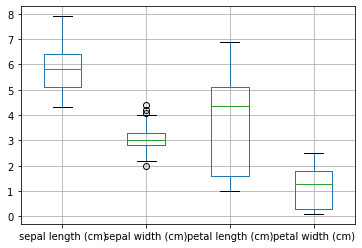

In [5]:
iris_df.boxplot();

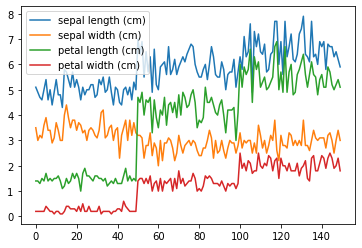

In [6]:
iris_df.plot();

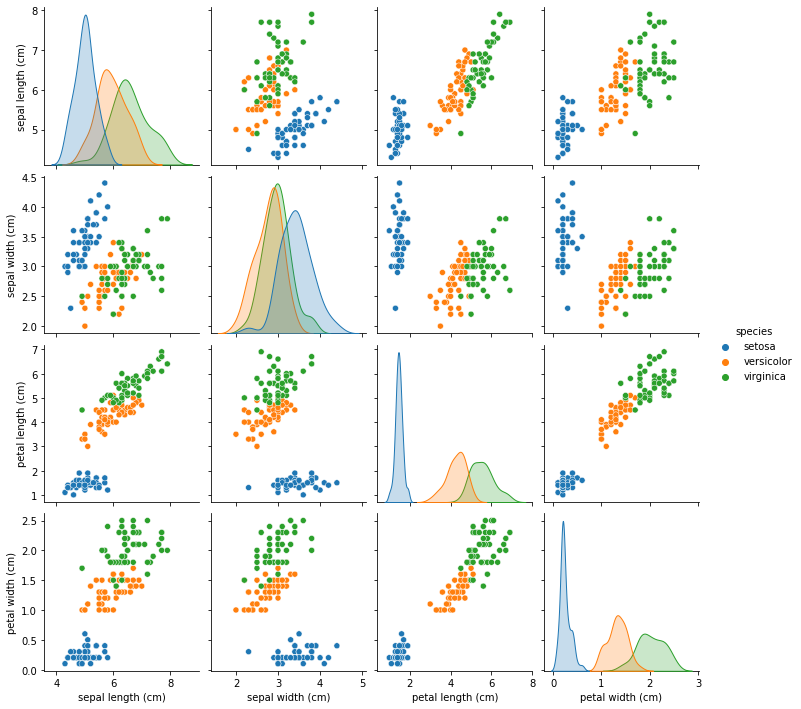

In [7]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

## 붓꽃 데이터에 대한 로지스틱 회귀 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]],
                                                              iris.target,
                                                              test_size=0.2,
                                                              random_state=1,
                                                              stratify=iris.target)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [12]:
print("학습 데이터 점수 = {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 = {}".format(model.score(X_test,y_test)))

학습 데이터 점수 = 0.9666666666666667
평가 데이터 점수 = 0.9666666666666667


In [14]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

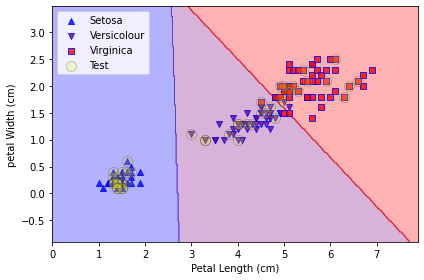

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('Setosa','Versicolour','Virginica')
markers = ('^','v','s')
colors = ('blue','purple','red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

for idx, c1 in enumerate(np.unique(y)):
  plt.scatter(x=X[y == c1, 0], y=X[y ==c1, 1],
              alpha=0.8, c=colors[idx],
              marker=markers[idx], label=species[c1],
              edgecolor='b')
  
X_comb_test, y_comb_test = X[range(105,150), :],y[range(105,150)]
plt.scatter(X_comb_test[:,0], X_comb_test[:,1],
            c='yellow', edgecolor='k', alpha=0.2,
            linewidth=1,marker='o',
            s=100,label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel("petal Width (cm)")
plt.legend(loc='upper left')
plt.tight_layout();

In [34]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1','l2'],
               'C':[2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,
                  scoring='accuracy',cv=10,n_jobs=multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [35]:
result = gs.fit(iris.data, iris.target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [37]:
print(gs.best_estimator_)
print("최적 점수 = {}".format(gs.best_score_))
print("최적 파라미터 = {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수 = 0.9800000000000001
최적 파라미터 = {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000261,0.000104,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.042701,0.003268,0.000430,0.000042,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000209,0.000020,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.041685,0.003223,0.000630,0.000579,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000207,0.000020,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.043591,0.004791,0.000413,0.000042,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000203,0.000029,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.049040,0.007799,0.000533,0.000374,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000214,0.000017,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.044375,0.007212,0.000444,0.000064,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
